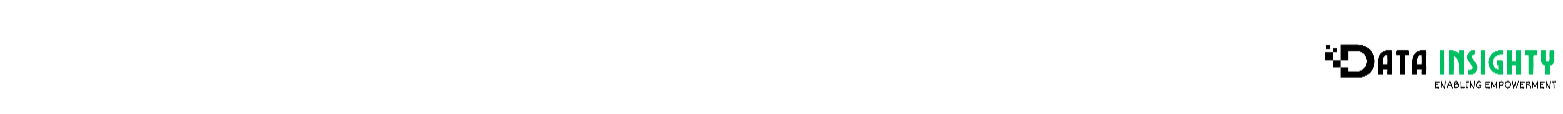

# Random Forest Regression (RFR)

Random Forest Regression is an ensemble learning method that builds multiple decision trees and merges their predictions to improve accuracy and reduce overfitting. Each tree in the forest is trained on a random subset of the data, and a random subset of features is considered at each split, introducing diversity among the trees.

Key Components:


Building Decision Trees: Multiple decision trees are constructed from random subsets of data and features, creating a diverse ensemble of models.

Training Decision Trees: Each tree is independently trained using recursive partitioning, which involves splitting the data to minimize prediction error (e.g., mean squared error).

Making Predictions: The final prediction is obtained by averaging the outputs of all trees in the forest, leading to more accurate and robust predictions compared to a single decision tree.

This randomness in data and feature selection makes Random Forest Regression resilient to overfitting and improves generalization.

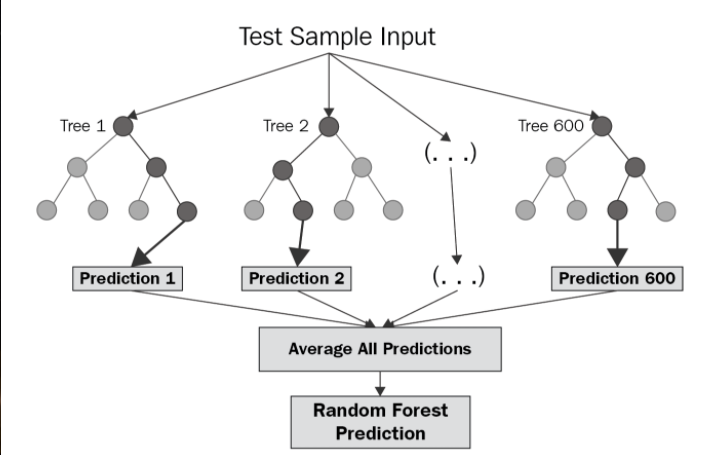

https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestRegressor.html

#  Random Forest Regression (RVR) with Position-Salaries dataset

In this Regression example we will consider sales based on "Position salries dataset".

In this notebook, we are going to build a Random Forest regression model to predict 'Salary' using ' Level of Position' as the independent variable.

This tutorial covers the following steps:

1. Importing libraries and loading data
2. Understanding the structure of the data
3. Training Random Forest Regression for entire data
4. Predicion using Random Forest Regression

# 1. Importing Librries and Loading data

Pandas is a powerful data manipulation and analysis library, providing data structures and functions to work with structured data.

NumPy is a fundamental package for scientific computing in Python. It provides support for multidimensional arrays and various mathematical functions to operate on these arrays.

Seaborn is a statistical data visualization library built on top of matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. pyplot is a module within Matplotlib that provides a MATLAB-like interface for plotting.

In [1]:
# Importing necessary libraries
import pandas as pd    # For data manipulation and analysis
import numpy as np     # For numerical computing
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots

Data set:https://www.kaggle.com/datasets/akram24/position-salaries/code downloded and saved in Local machine

In [2]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# 2. Understanding the Data

In [3]:
# Let's check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [4]:
# Identify variable types
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['Level', 'Salary'], dtype='object')
Categorical columns: Index(['Position'], dtype='object')



Frequency distribution for Position
Position
Business Analyst     1
Junior Consultant    1
Senior Consultant    1
Manager              1
Country Manager      1
Region Manager       1
Partner              1
Senior Partner       1
C-level              1
CEO                  1
Name: count, dtype: int64

Distribution for Level


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


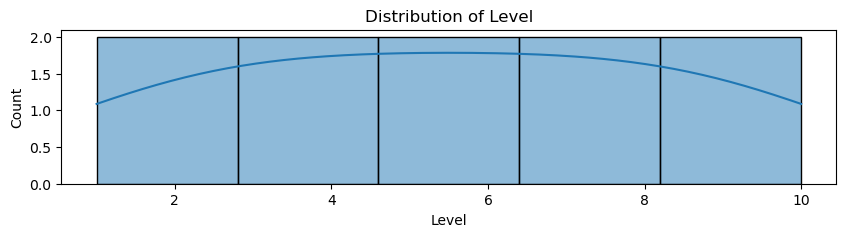

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Distribution for Salary


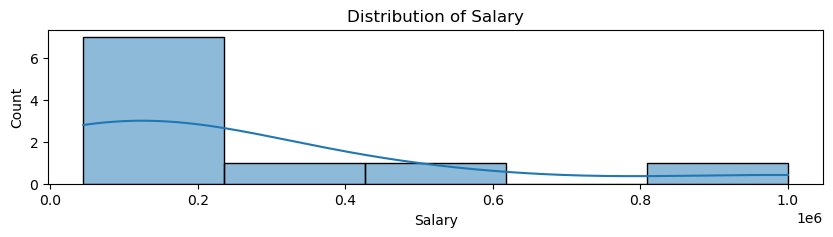

In [5]:
# Create frequency distributions
for col in categorical_cols:
    print("\nFrequency distribution for", col)
    print(df[col].value_counts())

for col in numerical_cols:
    print("\nDistribution for", col)
    plt.figure(figsize=(10, 2))
    sns.histplot(df[col], kde=True)
    plt.title("Distribution of " + col)
    plt.show()

In [6]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [7]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [8]:
y = y.reshape(len(y),1)

In [9]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling

In [10]:
# Importing the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Initializing StandardScaler for feature scaling
sc_X = StandardScaler()

# Initializing StandardScaler for target variable scaling
sc_y = StandardScaler()

# Scaling the feature matrix X using the fit_transform method of StandardScaler
X = sc_X.fit_transform(X)

# Scaling the target variable y using the fit_transform method of StandardScaler
y = sc_y.fit_transform(y)


In [11]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [12]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# 3. Perfroming Random Forest Regression (RFR)

## Training the Random Forest Regression model on the whole dataset

In [14]:
# Importing the Random Forest Regressor class from the sklearn library
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Fitting the Random Forest Regressor model to the training data (X: features, y: target variable)
regressor.fit(X, y.ravel())  # Using ravel() to convert y to a 1D array if needed


RandomForestRegressor(random_state=0)

## Visualising the Random Forest Regression results

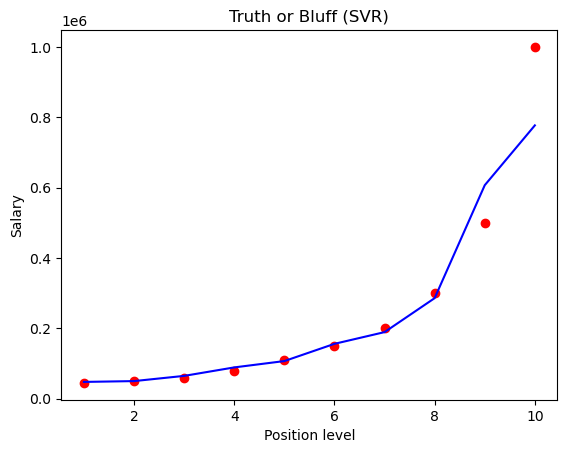

In [15]:
# Plotting the original data points (position levels vs. salaries) after inverse transformation
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')

# Plotting the SVR model predictions on the original X values after inverse transformation
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')

# Adding a title to the plot
plt.title('Truth or Bluff (RFR)')

# Adding labels to the X and Y axes
plt.xlabel('Position level')
plt.ylabel('Salary')

# Displaying the plot
plt.show()


# Visualising the Random Forest Regression results (for higher resolution and smoother curve)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17268\2344410662.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


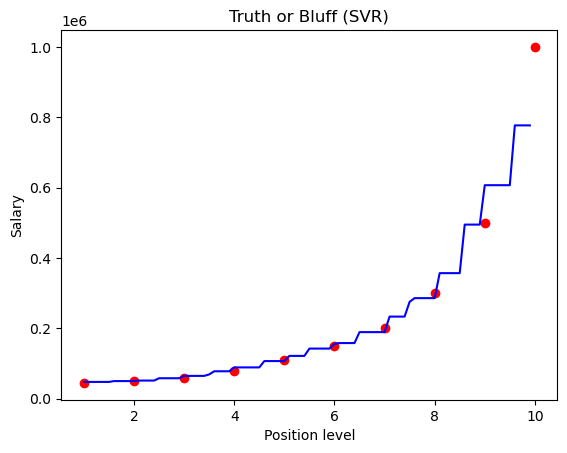

In [16]:
# Generating a range of values for the X-axis (position levels) using the inverse transformation of scaled features
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)

# Reshaping the X_grid array to be a column vector
X_grid = X_grid.reshape((len(X_grid), 1))

# Plotting the original data points (position levels vs. salaries) after inverse transformation
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')

# Plotting the SVR model predictions on the X_grid values after transformation
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color='blue')

# Adding a title to the plot
plt.title('Truth or Bluff (SVR)')

# Adding labels to the X and Y axes
plt.xlabel('Position level')
plt.ylabel('Salary')

# Displaying the plot
plt.show()


# Predicting a new result with Random Forest Regression

In [17]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[189400.]])

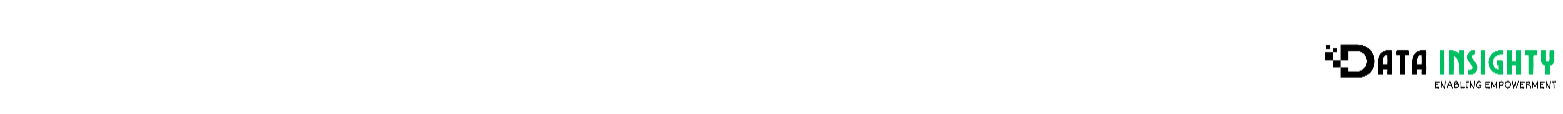